In [1]:
#efficientnetv1b0 trained on breakhis data
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.python.client import device_lib
from tensorflow.keras.models import Sequential
image_size = (224, 224)
batch_size = 32
train_ds = image_dataset_from_directory(
    directory="C:\\Users\\Administrator\\Desktop\\1\\train",
    image_size=image_size,
    batch_size=batch_size,
)


val_ds =  image_dataset_from_directory(
    directory="C:\\Users\\Administrator\\Desktop\\1\\valid",
    image_size=image_size,
    batch_size=batch_size,
)
test_ds =  image_dataset_from_directory(
    directory="C:\\Users\\Administrator\\Desktop\\1\\test",
    image_size=image_size,
    batch_size=batch_size,
)
if tf.test.gpu_device_name():
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("##############")
print(device_lib.list_local_devices())
print(tf.__version__)
img_augmentation = Sequential(
    [
        layers.RandomFlip(mode="horizontal_and_vertical"),
        layers.RandomRotation(factor=0.1),
        layers.RandomTranslation(height_factor=0.3, width_factor=0.3),
    ],
    name="img_augmentation",
)


Found 5545 files belonging to 2 classes.
Found 1182 files belonging to 2 classes.
Found 1182 files belonging to 2 classes.
Default GPU Device:/device:GPU:0
Num GPUs Available:  1
##############
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14425597219389418560
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 22729785344
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2585902041761505085
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:00:07.0, compute capability: 8.6"
xla_global_id: 416903419
]
2.8.0


In [2]:
IMG_SIZE=224
NUM_CLASSES=2
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
def build_model(num_classes):
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x = img_augmentation(inputs)
    model = EfficientNetB0(include_top=False, input_tensor=x, weights="imagenet")
    model.trainable = False

    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
  

    top_dropout_rate = 0.3
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)

    outputs = layers.Dense(NUM_CLASSES, activation="softmax", name="pred")(x)
    model = tf.keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    

    model.compile(
        optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model
model = build_model(num_classes=NUM_CLASSES)
model.summary()

Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 img_augmentation (Sequential)  (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['img_augmentation[0][0]']       
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']   

 block2a_project_conv (Conv2D)  (None, 56, 56, 24)   2304        ['block2a_se_excite[0][0]']      
                                                                                                  
 block2a_project_bn (BatchNorma  (None, 56, 56, 24)  96          ['block2a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2b_expand_conv (Conv2D)   (None, 56, 56, 144)  3456        ['block2a_project_bn[0][0]']     
                                                                                                  
 block2b_expand_bn (BatchNormal  (None, 56, 56, 144)  576        ['block2b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2b_e

 block3b_expand_bn (BatchNormal  (None, 28, 28, 240)  960        ['block3b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block3b_expand_activation (Act  (None, 28, 28, 240)  0          ['block3b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3b_dwconv (DepthwiseConv2  (None, 28, 28, 240)  6000       ['block3b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block3b_bn (BatchNormalization  (None, 28, 28, 240)  960        ['block3b_dwconv[0][0]']         
 )        

 D)                                                              ']                               
                                                                                                  
 block4b_bn (BatchNormalization  (None, 14, 14, 480)  1920       ['block4b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block4b_activation (Activation  (None, 14, 14, 480)  0          ['block4b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4b_se_squeeze (GlobalAver  (None, 480)         0           ['block4b_activation[0][0]']     
 agePooling2D)                                                                                    
          

 block5a_activation (Activation  (None, 14, 14, 480)  0          ['block5a_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5a_se_squeeze (GlobalAver  (None, 480)         0           ['block5a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5a_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block5a_se_squeeze[0][0]']     
                                                                                                  
 block5a_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block5a_se_reshape[0][0]']     
                                                                                                  
 block5a_s

 block5c_se_expand (Conv2D)     (None, 1, 1, 672)    19488       ['block5c_se_reduce[0][0]']      
                                                                                                  
 block5c_se_excite (Multiply)   (None, 14, 14, 672)  0           ['block5c_activation[0][0]',     
                                                                  'block5c_se_expand[0][0]']      
                                                                                                  
 block5c_project_conv (Conv2D)  (None, 14, 14, 112)  75264       ['block5c_se_excite[0][0]']      
                                                                                                  
 block5c_project_bn (BatchNorma  (None, 14, 14, 112)  448        ['block5c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5c_d

 block6b_project_bn (BatchNorma  (None, 7, 7, 192)   768         ['block6b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6b_drop (Dropout)         (None, 7, 7, 192)    0           ['block6b_project_bn[0][0]']     
                                                                                                  
 block6b_add (Add)              (None, 7, 7, 192)    0           ['block6b_drop[0][0]',           
                                                                  'block6a_project_bn[0][0]']     
                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6b_add[0][0]']            
                                                                                                  
 block6c_e

 block6d_add (Add)              (None, 7, 7, 192)    0           ['block6d_drop[0][0]',           
                                                                  'block6c_add[0][0]']            
                                                                                                  
 block7a_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6d_add[0][0]']            
                                                                                                  
 block7a_expand_bn (BatchNormal  (None, 7, 7, 1152)  4608        ['block7a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block7a_expand_activation (Act  (None, 7, 7, 1152)  0           ['block7a_expand_bn[0][0]']      
 ivation)                                                                                         
          

In [3]:
import tensorflow_addons as tfa
def unfreeze_model(model):
    for layer in model.layers:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True
optimizers = [
    tf.keras.optimizers.Adam(learning_rate=1e-4),
    tf.keras.optimizers.Adam(learning_rate=1e-3)]
optimizers_and_layers = [(optimizers[0], model.layers[0:-1]), (optimizers[1], model.layers[-1])]
optimizer = tfa.optimizers.MultiOptimizer(optimizers_and_layers)
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
unfreeze_model(model)
model.summary()

Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 img_augmentation (Sequential)  (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['img_augmentation[0][0]']       
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']   

 block2a_project_conv (Conv2D)  (None, 56, 56, 24)   2304        ['block2a_se_excite[0][0]']      
                                                                                                  
 block2a_project_bn (BatchNorma  (None, 56, 56, 24)  96          ['block2a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2b_expand_conv (Conv2D)   (None, 56, 56, 144)  3456        ['block2a_project_bn[0][0]']     
                                                                                                  
 block2b_expand_bn (BatchNormal  (None, 56, 56, 144)  576        ['block2b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2b_e

 block3b_expand_bn (BatchNormal  (None, 28, 28, 240)  960        ['block3b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block3b_expand_activation (Act  (None, 28, 28, 240)  0          ['block3b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3b_dwconv (DepthwiseConv2  (None, 28, 28, 240)  6000       ['block3b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block3b_bn (BatchNormalization  (None, 28, 28, 240)  960        ['block3b_dwconv[0][0]']         
 )        

 D)                                                              ']                               
                                                                                                  
 block4b_bn (BatchNormalization  (None, 14, 14, 480)  1920       ['block4b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block4b_activation (Activation  (None, 14, 14, 480)  0          ['block4b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4b_se_squeeze (GlobalAver  (None, 480)         0           ['block4b_activation[0][0]']     
 agePooling2D)                                                                                    
          

 block5a_activation (Activation  (None, 14, 14, 480)  0          ['block5a_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5a_se_squeeze (GlobalAver  (None, 480)         0           ['block5a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5a_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block5a_se_squeeze[0][0]']     
                                                                                                  
 block5a_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block5a_se_reshape[0][0]']     
                                                                                                  
 block5a_s

 block5c_se_expand (Conv2D)     (None, 1, 1, 672)    19488       ['block5c_se_reduce[0][0]']      
                                                                                                  
 block5c_se_excite (Multiply)   (None, 14, 14, 672)  0           ['block5c_activation[0][0]',     
                                                                  'block5c_se_expand[0][0]']      
                                                                                                  
 block5c_project_conv (Conv2D)  (None, 14, 14, 112)  75264       ['block5c_se_excite[0][0]']      
                                                                                                  
 block5c_project_bn (BatchNorma  (None, 14, 14, 112)  448        ['block5c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5c_d

 block6b_project_bn (BatchNorma  (None, 7, 7, 192)   768         ['block6b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6b_drop (Dropout)         (None, 7, 7, 192)    0           ['block6b_project_bn[0][0]']     
                                                                                                  
 block6b_add (Add)              (None, 7, 7, 192)    0           ['block6b_drop[0][0]',           
                                                                  'block6a_project_bn[0][0]']     
                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6b_add[0][0]']            
                                                                                                  
 block6c_e

 block6d_add (Add)              (None, 7, 7, 192)    0           ['block6d_drop[0][0]',           
                                                                  'block6c_add[0][0]']            
                                                                                                  
 block7a_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6d_add[0][0]']            
                                                                                                  
 block7a_expand_bn (BatchNormal  (None, 7, 7, 1152)  4608        ['block7a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block7a_expand_activation (Act  (None, 7, 7, 1152)  0           ['block7a_expand_bn[0][0]']      
 ivation)                                                                                         
          

In [4]:
callbacks = [
keras.callbacks.ModelCheckpoint(
    filepath='C:\\Users\\Administrator\\Desktop\\breakhis\\efficientnetv1b0best.h5',
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)]
hist=model.fit(train_ds,epochs=40,validation_data=val_ds,callbacks=callbacks)

Epoch 1/40
174/174 [==============================] - 92s 273ms/step - loss: 0.3034 - accuracy: 0.8725 - val_loss: 0.2666 - val_accuracy: 0.8909
Epoch 2/40
174/174 [==============================] - 52s 294ms/step - loss: 0.1908 - accuracy: 0.9270 - val_loss: 0.2357 - val_accuracy: 0.9129
Epoch 3/40
174/174 [==============================] - 52s 298ms/step - loss: 0.1525 - accuracy: 0.9410 - val_loss: 0.1037 - val_accuracy: 0.9577
Epoch 4/40
174/174 [==============================] - 51s 294ms/step - loss: 0.1070 - accuracy: 0.9616 - val_loss: 0.1120 - val_accuracy: 0.9594
Epoch 5/40
174/174 [==============================] - 48s 273ms/step - loss: 0.0913 - accuracy: 0.9661 - val_loss: 0.1053 - val_accuracy: 0.9577
Epoch 6/40
174/174 [==============================] - 51s 292ms/step - loss: 0.0839 - accuracy: 0.9670 - val_loss: 0.0825 - val_accuracy: 0.9729
Epoch 7/40
174/174 [==============================] - 53s 301ms/step - loss: 0.0658 - accuracy: 0.9751 - val_loss: 0.0753 - val_ac

{'loss': [0.30343854427337646, 0.19083374738693237, 0.15252208709716797, 0.10702435672283173, 0.09133658558130264, 0.08387626707553864, 0.0657920390367508, 0.06545012444257736, 0.05585281923413277, 0.049600567668676376, 0.0538233257830143, 0.050871800631284714, 0.036758143454790115, 0.03634532541036606, 0.028691528365015984, 0.03347393497824669, 0.030330715700984, 0.02610331028699875, 0.018951302394270897, 0.035004884004592896, 0.026515334844589233, 0.03376001864671707, 0.017118725925683975, 0.026702476665377617, 0.027570713311433792, 0.02757316827774048, 0.020773695781826973, 0.012057510204613209, 0.023914270102977753, 0.030617130920290947, 0.024923650547862053, 0.017489494755864143, 0.01686028577387333, 0.03008871152997017, 0.011740791611373425, 0.008638801984488964, 0.018732693046331406, 0.011110489256680012, 0.00942208431661129, 0.03743855655193329], 'accuracy': [0.8724977374076843, 0.9269612431526184, 0.9410279393196106, 0.9615870118141174, 0.9660955667495728, 0.9669972658157349, 

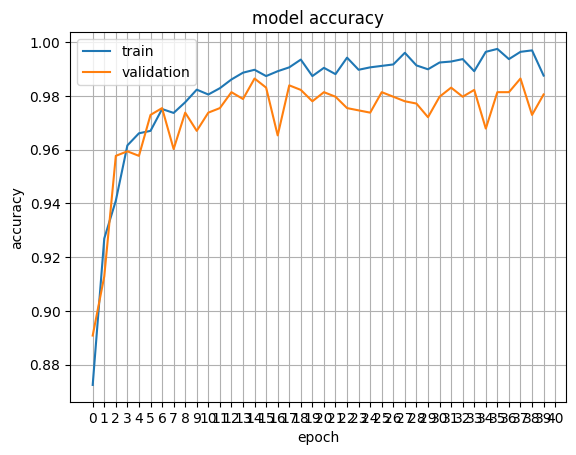

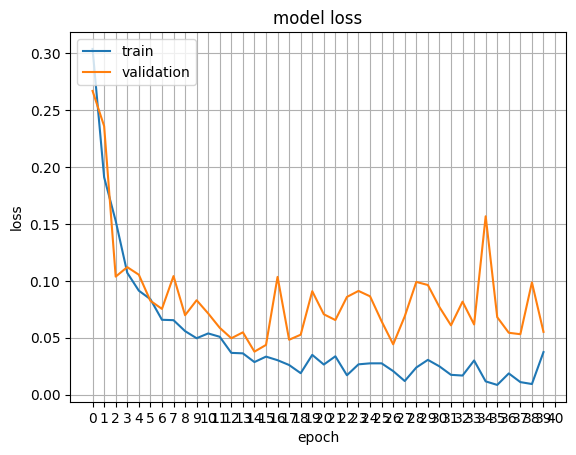

In [5]:
print(hist.history)
import matplotlib.pyplot as plt
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.grid(True)
    plt.xticks([i for i in range(41)])
    plt.show()


plot_hist(hist)
def plot_hist(hist):
    plt.plot(hist.history["loss"])
    plt.plot(hist.history["val_loss"])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.grid(True)
    plt.xticks([i for i in range(41)])
    plt.show()


plot_hist(hist)

In [6]:
import tensorflow_addons as tfa
from keras.models import load_model
model1 = load_model('C:\\Users\\Administrator\\Desktop\\breakhis\\efficientnetv1b0best.h5')
a=model1.evaluate(
    x=test_ds
)
a=model1.evaluate(
    x=val_ds
)

37/37 [==============================] - 3s 60ms/step - loss: 0.0378 - accuracy: 0.9865


In [7]:
#with stained normalization vahadane
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.python.client import device_lib
from tensorflow.keras.models import Sequential
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("##############")
if tf.test.gpu_device_name():
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")
print(device_lib.list_local_devices())
print(tf.__version__)
image_size = (224, 224)
batch_size = 32
train_ds = image_dataset_from_directory(
    directory="C:\\Users\\Administrator\\Desktop\\1n\\train",
    image_size=image_size,
    batch_size=batch_size,
)
val_ds =  image_dataset_from_directory(
    directory="C:\\Users\\Administrator\\Desktop\\1n\\valid",
    image_size=image_size,
    batch_size=batch_size,
)
test_ds =  image_dataset_from_directory(
    directory="C:\\Users\\Administrator\\Desktop\\1n\\test",
    image_size=image_size,
    batch_size=batch_size,
)

img_augmentation = Sequential(
    [
        layers.RandomFlip(mode="horizontal_and_vertical"),
        layers.RandomRotation(factor=0.1),
        layers.RandomTranslation(height_factor=0.3, width_factor=0.3),
    ],
    name="img_augmentation",
)



Found 5545 files belonging to 2 classes.
Found 1182 files belonging to 2 classes.
Found 1182 files belonging to 2 classes.
Default GPU Device:/device:GPU:0
Num GPUs Available:  1
##############
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1585230873966201745
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 22729785344
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15286057080926494649
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:00:07.0, compute capability: 8.6"
xla_global_id: 416903419
]
2.8.0


In [8]:
IMG_SIZE=224
NUM_CLASSES=2
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
def build_model(num_classes):
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x = img_augmentation(inputs)
    model = EfficientNetB0(include_top=False, input_tensor=x, weights="imagenet")

    model.trainable = False

    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
  

    top_dropout_rate = 0.3
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(NUM_CLASSES, activation="softmax", name="pred")(x)

    model = tf.keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    

    model.compile(
        optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model
model = build_model(num_classes=NUM_CLASSES)
model.summary()

Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 img_augmentation (Sequential)  (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['img_augmentation[0][0]']       
                                                                                                  
 normalization_1 (Normalization  (None, 224, 224, 3)  7          ['rescaling_1[0][0]'] 

                                                                                                  
 block2a_project_conv (Conv2D)  (None, 56, 56, 24)   2304        ['block2a_se_excite[0][0]']      
                                                                                                  
 block2a_project_bn (BatchNorma  (None, 56, 56, 24)  96          ['block2a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2b_expand_conv (Conv2D)   (None, 56, 56, 144)  3456        ['block2a_project_bn[0][0]']     
                                                                                                  
 block2b_expand_bn (BatchNormal  (None, 56, 56, 144)  576        ['block2b_expand_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 block3b_expand_bn (BatchNormal  (None, 28, 28, 240)  960        ['block3b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block3b_expand_activation (Act  (None, 28, 28, 240)  0          ['block3b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3b_dwconv (DepthwiseConv2  (None, 28, 28, 240)  6000       ['block3b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block3b_b

 block4b_dwconv (DepthwiseConv2  (None, 14, 14, 480)  4320       ['block4b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block4b_bn (BatchNormalization  (None, 14, 14, 480)  1920       ['block4b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block4b_activation (Activation  (None, 14, 14, 480)  0          ['block4b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4b_se_squeeze (GlobalAver  (None, 480)         0           ['block4b_activation[0][0]']     
 agePoolin

                                                                                                  
 block5a_activation (Activation  (None, 14, 14, 480)  0          ['block5a_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5a_se_squeeze (GlobalAver  (None, 480)         0           ['block5a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5a_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block5a_se_squeeze[0][0]']     
                                                                                                  
 block5a_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block5a_se_reshape[0][0]']     
          

                                                                                                  
 block5c_se_expand (Conv2D)     (None, 1, 1, 672)    19488       ['block5c_se_reduce[0][0]']      
                                                                                                  
 block5c_se_excite (Multiply)   (None, 14, 14, 672)  0           ['block5c_activation[0][0]',     
                                                                  'block5c_se_expand[0][0]']      
                                                                                                  
 block5c_project_conv (Conv2D)  (None, 14, 14, 112)  75264       ['block5c_se_excite[0][0]']      
                                                                                                  
 block5c_project_bn (BatchNorma  (None, 14, 14, 112)  448        ['block5c_project_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 block6b_project_bn (BatchNorma  (None, 7, 7, 192)   768         ['block6b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6b_drop (Dropout)         (None, 7, 7, 192)    0           ['block6b_project_bn[0][0]']     
                                                                                                  
 block6b_add (Add)              (None, 7, 7, 192)    0           ['block6b_drop[0][0]',           
                                                                  'block6a_project_bn[0][0]']     
                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6b_add[0][0]']            
          

                                                                                                  
 block6d_add (Add)              (None, 7, 7, 192)    0           ['block6d_drop[0][0]',           
                                                                  'block6c_add[0][0]']            
                                                                                                  
 block7a_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6d_add[0][0]']            
                                                                                                  
 block7a_expand_bn (BatchNormal  (None, 7, 7, 1152)  4608        ['block7a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block7a_expand_activation (Act  (None, 7, 7, 1152)  0           ['block7a_expand_bn[0][0]']      
 ivation) 

In [9]:
import tensorflow_addons as tfa
def unfreeze_model(model):
    for layer in model.layers:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True
optimizers = [
    tf.keras.optimizers.Adam(learning_rate=1e-4),
    tf.keras.optimizers.Adam(learning_rate=1e-3)]
optimizers_and_layers = [(optimizers[0], model.layers[0:-1]), (optimizers[1], model.layers[-1])]
optimizer = tfa.optimizers.MultiOptimizer(optimizers_and_layers)
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
unfreeze_model(model)
model.summary()

Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 img_augmentation (Sequential)  (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['img_augmentation[0][0]']       
                                                                                                  
 normalization_1 (Normalization  (None, 224, 224, 3)  7          ['rescaling_1[0][0]'] 

                                                                                                  
 block2a_project_conv (Conv2D)  (None, 56, 56, 24)   2304        ['block2a_se_excite[0][0]']      
                                                                                                  
 block2a_project_bn (BatchNorma  (None, 56, 56, 24)  96          ['block2a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2b_expand_conv (Conv2D)   (None, 56, 56, 144)  3456        ['block2a_project_bn[0][0]']     
                                                                                                  
 block2b_expand_bn (BatchNormal  (None, 56, 56, 144)  576        ['block2b_expand_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 block3b_expand_bn (BatchNormal  (None, 28, 28, 240)  960        ['block3b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block3b_expand_activation (Act  (None, 28, 28, 240)  0          ['block3b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3b_dwconv (DepthwiseConv2  (None, 28, 28, 240)  6000       ['block3b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block3b_b

 block4b_dwconv (DepthwiseConv2  (None, 14, 14, 480)  4320       ['block4b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block4b_bn (BatchNormalization  (None, 14, 14, 480)  1920       ['block4b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block4b_activation (Activation  (None, 14, 14, 480)  0          ['block4b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4b_se_squeeze (GlobalAver  (None, 480)         0           ['block4b_activation[0][0]']     
 agePoolin

                                                                                                  
 block5a_activation (Activation  (None, 14, 14, 480)  0          ['block5a_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5a_se_squeeze (GlobalAver  (None, 480)         0           ['block5a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5a_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block5a_se_squeeze[0][0]']     
                                                                                                  
 block5a_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block5a_se_reshape[0][0]']     
          

                                                                                                  
 block5c_se_expand (Conv2D)     (None, 1, 1, 672)    19488       ['block5c_se_reduce[0][0]']      
                                                                                                  
 block5c_se_excite (Multiply)   (None, 14, 14, 672)  0           ['block5c_activation[0][0]',     
                                                                  'block5c_se_expand[0][0]']      
                                                                                                  
 block5c_project_conv (Conv2D)  (None, 14, 14, 112)  75264       ['block5c_se_excite[0][0]']      
                                                                                                  
 block5c_project_bn (BatchNorma  (None, 14, 14, 112)  448        ['block5c_project_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 block6b_project_bn (BatchNorma  (None, 7, 7, 192)   768         ['block6b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6b_drop (Dropout)         (None, 7, 7, 192)    0           ['block6b_project_bn[0][0]']     
                                                                                                  
 block6b_add (Add)              (None, 7, 7, 192)    0           ['block6b_drop[0][0]',           
                                                                  'block6a_project_bn[0][0]']     
                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6b_add[0][0]']            
          

                                                                                                  
 block6d_add (Add)              (None, 7, 7, 192)    0           ['block6d_drop[0][0]',           
                                                                  'block6c_add[0][0]']            
                                                                                                  
 block7a_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6d_add[0][0]']            
                                                                                                  
 block7a_expand_bn (BatchNormal  (None, 7, 7, 1152)  4608        ['block7a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block7a_expand_activation (Act  (None, 7, 7, 1152)  0           ['block7a_expand_bn[0][0]']      
 ivation) 

In [10]:
callbacks = [
keras.callbacks.ModelCheckpoint(
    filepath='C:\\Users\\Administrator\\Desktop\\breakhis\\efficientnetv1b0beststained.h5',
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)]
hist=model.fit(train_ds,epochs=40,validation_data=val_ds,callbacks=callbacks)

Epoch 1/40
174/174 [==============================] - 81s 323ms/step - loss: 0.5386 - accuracy: 0.7329 - val_loss: 0.4253 - val_accuracy: 0.7910
Epoch 2/40
174/174 [==============================] - 50s 285ms/step - loss: 0.3796 - accuracy: 0.8375 - val_loss: 0.2411 - val_accuracy: 0.9027
Epoch 3/40
174/174 [==============================] - 52s 298ms/step - loss: 0.2675 - accuracy: 0.8916 - val_loss: 0.1779 - val_accuracy: 0.9374
Epoch 4/40
174/174 [==============================] - 51s 291ms/step - loss: 0.2349 - accuracy: 0.9077 - val_loss: 0.1814 - val_accuracy: 0.9315
Epoch 5/40
174/174 [==============================] - 52s 297ms/step - loss: 0.2017 - accuracy: 0.9225 - val_loss: 0.1434 - val_accuracy: 0.9399
Epoch 6/40
174/174 [==============================] - 50s 285ms/step - loss: 0.1881 - accuracy: 0.9248 - val_loss: 0.1964 - val_accuracy: 0.9171
Epoch 7/40
174/174 [==============================] - 48s 271ms/step - loss: 0.1667 - accuracy: 0.9306 - val_loss: 0.1352 - val_ac

{'loss': [0.5386394262313843, 0.37955185770988464, 0.26746395230293274, 0.2349226176738739, 0.20172102749347687, 0.18806369602680206, 0.1666966825723648, 0.14567217230796814, 0.13744758069515228, 0.12307430803775787, 0.11368361860513687, 0.1062525287270546, 0.10442852973937988, 0.09298770129680634, 0.09964504092931747, 0.07160533219575882, 0.08174668997526169, 0.07176999747753143, 0.05872151255607605, 0.07163851708173752, 0.06414277851581573, 0.06909768283367157, 0.0696607455611229, 0.07062429934740067, 0.06745705008506775, 0.05059422180056572, 0.0501105934381485, 0.056358933448791504, 0.04644792899489403, 0.050517015159130096, 0.04426775872707367, 0.03764093667268753, 0.04809681326150894, 0.04105941578745842, 0.047726064920425415, 0.04294247925281525, 0.04038941487669945, 0.03829954192042351, 0.04530929774045944, 0.042148713022470474], 'accuracy': [0.732912540435791, 0.8375113010406494, 0.8916140794754028, 0.9076645374298096, 0.9224526882171631, 0.9247971177101135, 0.9305680990219116,

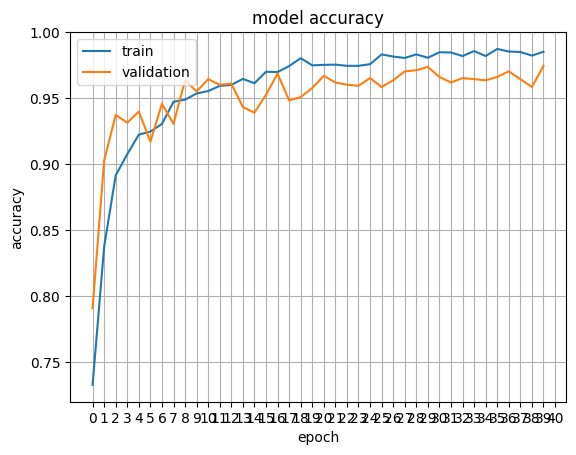

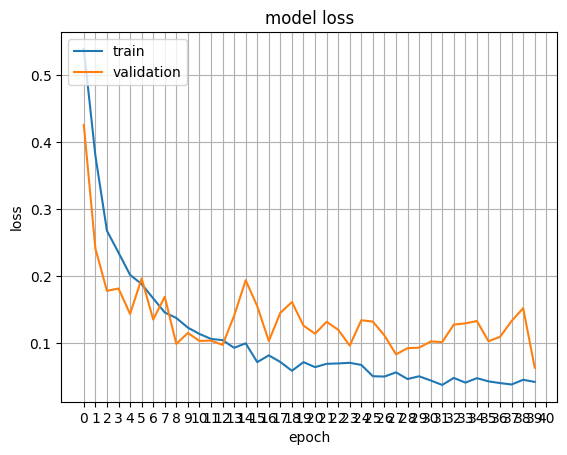

In [11]:
print(hist.history)
import matplotlib.pyplot as plt
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.grid(True)
    plt.xticks([i for i in range(41)])
    plt.show()


plot_hist(hist)
def plot_hist(hist):
    plt.plot(hist.history["loss"])
    plt.plot(hist.history["val_loss"])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.grid(True)
    plt.xticks([i for i in range(41)])
    plt.show()


plot_hist(hist)

In [12]:
import tensorflow_addons as tfa
from keras.models import load_model
model1 = load_model('C:\\Users\\Administrator\\Desktop\\breakhis\\efficientnetv1b0beststained.h5')
a=model1.evaluate(
    x=test_ds
)
a=model1.evaluate(
    x=val_ds
)

37/37 [==============================] - 2s 56ms/step - loss: 0.0633 - accuracy: 0.9746
